In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.8 MB/s 


In [3]:
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import train_test_split

import shap

In [4]:
from sklearn.metrics import mean_squared_error

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_csv('/content/drive/MyDrive/신입기수 프로젝트/Dataset/newdata5.csv', encoding='cp949')
data

,날짜,대곡교_강수량,진관교_강수량,송정동_강수량,서울시_강수량,방류량,강화대교_조위,청담대교_유량,한강대교_유량,행주대교_유량,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위
0,2012-05-01 0:00,0.0,0.0,0.0,0.0,575.70,193.0,469.05,729.80,540.18,310.7,300.2,290.0,275.3
1,2012-05-01 0:10,0.0,0.0,0.0,0.0,575.30,199.0,498.00,731.48,540.18,314.7,300.2,290.0,275.3
2,2012-05-01 0:20,0.0,0.0,0.0,0.0,555.00,207.0,490.68,726.42,540.18,313.7,301.2,290.0,275.3
3,2012-05-01 0:30,0.0,0.0,0.0,0.0,575.70,215.0,476.21,726.42,552.17,311.7,301.2,290.0,276.3
4,2012-05-01 0:40,0.0,0.0,0.0,0.0,575.40,226.0,476.21,707.17,564.29,311.7,301.2,291.0,277.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276331,2022-07-18 23:10,0.0,0.0,0.0,0.0,258.67,407.0,319.84,-456.41,974.40,288.0,295.0,299.0,306.0
276332,2022-07-18 23:20,0.0,0.0,0.0,0.0,258.58,431.0,314.01,-717.30,1006.88,287.0,303.0,304.0,308.0
276333,2022-07-18 23:30,0.0,0.0,0.0,0.0,258.56,453.0,387.55,-843.37,1039.90,299.0,307.0,309.0,310.0
276334,2022-07-18 23:40,0.0,0.0,0.0,0.0,258.65,476.0,454.91,-1023.37,1073.46,309.0,311.0,314.0,312.0


In [7]:
광진교 = pd.read_csv('/content/drive/MyDrive/신입기수 프로젝트/Dataset/cnn_광진.csv')
data['광진교_수위'] = 광진교['수위']

data.set_index(keys = ['날짜'], inplace = True)
data.index = pd.to_datetime(data.index, format = '%Y-%m-%d %H:%M')
data

,대곡교_강수량,진관교_강수량,송정동_강수량,서울시_강수량,방류량,강화대교_조위,청담대교_유량,한강대교_유량,행주대교_유량,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위,광진교_수위
날짜,,,,,,,,,,,,,,
2012-05-01 00:00:00,0.0,0.0,0.0,0.0,575.70,193.0,469.05,729.80,540.18,310.7,300.2,290.0,275.3,1.20
2012-05-01 00:10:00,0.0,0.0,0.0,0.0,575.30,199.0,498.00,731.48,540.18,314.7,300.2,290.0,275.3,1.20
2012-05-01 00:20:00,0.0,0.0,0.0,0.0,555.00,207.0,490.68,726.42,540.18,313.7,301.2,290.0,275.3,1.20
2012-05-01 00:30:00,0.0,0.0,0.0,0.0,575.70,215.0,476.21,726.42,552.17,311.7,301.2,290.0,276.3,1.20
2012-05-01 00:40:00,0.0,0.0,0.0,0.0,575.40,226.0,476.21,707.17,564.29,311.7,301.2,291.0,277.3,1.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,0.0,0.0,0.0,0.0,258.67,407.0,319.84,-456.41,974.40,288.0,295.0,299.0,306.0,1.12
2022-07-18 23:20:00,0.0,0.0,0.0,0.0,258.58,431.0,314.01,-717.30,1006.88,287.0,303.0,304.0,308.0,1.12
2022-07-18 23:30:00,0.0,0.0,0.0,0.0,258.56,453.0,387.55,-843.37,1039.90,299.0,307.0,309.0,310.0,1.12


In [8]:
import xgboost
from xgboost import XGBRegressor

In [9]:
import matplotlib 
matplotlib.font_manager._rebuild()

### 강화대교_조위

In [10]:
input_y = data['강화대교_조위']
input_x = data

# 정규화
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

input_x_regular = input_x.copy()

for i in range(len(input_x.columns)):
    scaler = MinMaxScaler()                       #StandardScaler() , MinMaxScaler() , RobustScaler()
    a=np.array(input_x_regular.iloc[:,i])
    tmp_x = scaler.fit_transform(a.reshape(-1,1))
    input_x_regular.iloc[:,i] = tmp_x

input_regular = pd.concat([input_x_regular, input_y], axis = 1)
data = input_regular

In [11]:
feature_comb = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

num_features = len(feature_comb)   # 독립변수 개수

train_set = data.iloc[0:269423, feature_comb].values
train_label = data.iloc[1:269424, -1].values  
test_set = data.iloc[-6913:-1, feature_comb].values
test_label = data.iloc[-6912:, -1].values

train_set, train_label = np.array(train_set).reshape(-1, num_features), np.array(train_label).reshape(-1, 1)
test_set, test_label = np.array(test_set).reshape(-1, num_features), np.array(test_label).reshape(-1, 1)

In [12]:
model = XGBRegressor(n_jobs=-1, n_estimators=800, learning_rate=0.08, grow_policy='lossguide', num_parallel_tree=4)

In [13]:
model.fit(test_set, np.ravel(test_label))

[13:36:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(grow_policy='lossguide', learning_rate=0.08, n_estimators=800,
             n_jobs=-1, num_parallel_tree=4)

In [14]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test_set)

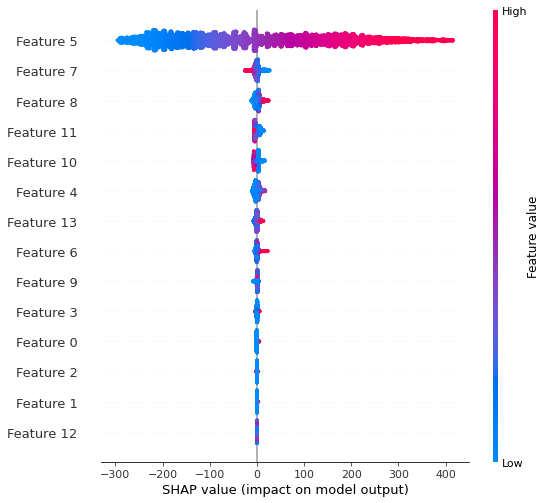

In [15]:
shap.summary_plot(shap_values, test_set, plot_type='dot')
                  #feature_names = ['대곡교_강수량',	'진관교_강수량',	'송정동_강수량',	'서울시_강수량',	'방류량',	'강화대교_조위',	'청담대교_유량',	'한강대교_유량',	'행주대교_유량',	'ㅠㅠ',	'잠수교_수위',	'한강대교_수위',	'행주대교_수위',	'광진교_수위'])

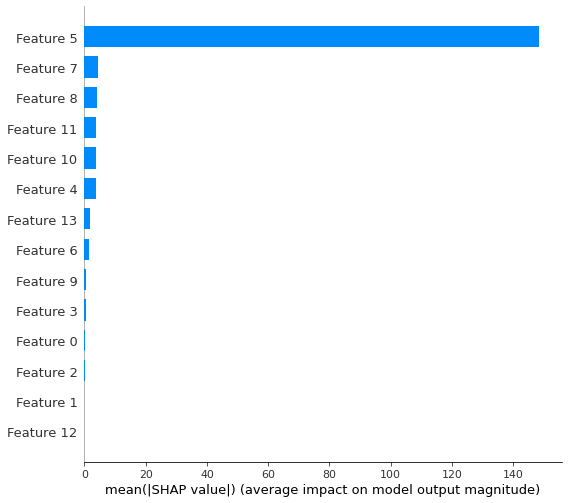

In [16]:
shap.summary_plot(shap_values, test_set, plot_type='bar')
# feature_names = ['대곡교_강수량',	'진관교_강수량',	'송정동_강수량',	'서울시_강수량',	'방류량',	'강화대교_조위',	'청담대교_유량',	'한강대교_유량',	'행주대교_유량',	'청담대교_수위',	'잠수교_수위',	'한강대교_수위',	'행주대교_수위',	'광진교_수위'])